In [81]:
! pip install google-api-python-client

In [82]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns

In [83]:
# apiKey = [redacted]
# channelID = 'UC9-y-6csu5WGm29I7JiwpnA'

channelIDs = ['UC9-y-6csu5WGm29I7JiwpnA','UCcem9I78ybZLHLRUlkUO3sw',
              'UC5rPp4vKg6AN8qnRCZ_RkPA', 'UCpCSAcbqs-sjEVfk_hMfY9w',
              'UC3cpN6gcJQqcCM6mxRUo_dA']

youtube = build('youtube', "v3", developerKey = apiKey)

In [84]:
def retrieve_stats(youtube, channelIDs):
    allData = []
    request = youtube.channels().list(
        part = 'snippet, contentDetails, statistics', id =  ','.join(channelIDs))
    
    response = request.execute()

    for i in range(len(response['items'])):
        data = dict(channelName = response['items'][i]['snippet']['title'],
                subscriberCount = response['items'][i]['statistics']['subscriberCount'],
                viewCount = response['items'][i]['statistics']['viewCount'],
                totalVideos = response['items'][i]['statistics']['videoCount'])
        allData.append(data)

    return allData

In [85]:
retrieve_stats(youtube, channelIDs)

[{'channelName': 'Michael Palmisano',
  'subscriberCount': '573000',
  'viewCount': '79915740',
  'totalVideos': '1104'},
 {'channelName': 'The Proper People',
  'subscriberCount': '1460000',
  'viewCount': '159330380',
  'totalVideos': '256'},
 {'channelName': 'Computerphile',
  'subscriberCount': '2370000',
  'viewCount': '207544539',
  'totalVideos': '809'},
 {'channelName': 'Wendigoon',
  'subscriberCount': '3500000',
  'viewCount': '432060114',
  'totalVideos': '145'},
 {'channelName': 'Zach Star',
  'subscriberCount': '1310000',
  'viewCount': '136908177',
  'totalVideos': '253'}]

In [86]:
channel_stats = retrieve_stats(youtube, channelIDs)

In [87]:
channelData = pd.DataFrame(channel_stats)

In [88]:
channelData

,channelName,subscriberCount,viewCount,totalVideos
0,The Proper People,1460000,159330380,256
1,Computerphile,2370000,207544539,809
2,Michael Palmisano,573000,79915740,1104
3,Zach Star,1310000,136908177,253
4,Wendigoon,3500000,432060114,145


In [89]:
channelData['subscriberCount'] = pd.to_numeric(channelData['subscriberCount'])
channelData['viewCount'] = pd.to_numeric(channelData['viewCount'])
channelData['totalVideos'] = pd.to_numeric(channelData['totalVideos'])
channelData.dtypes

channelName        object
subscriberCount     int64
viewCount           int64
totalVideos         int64
dtype: object

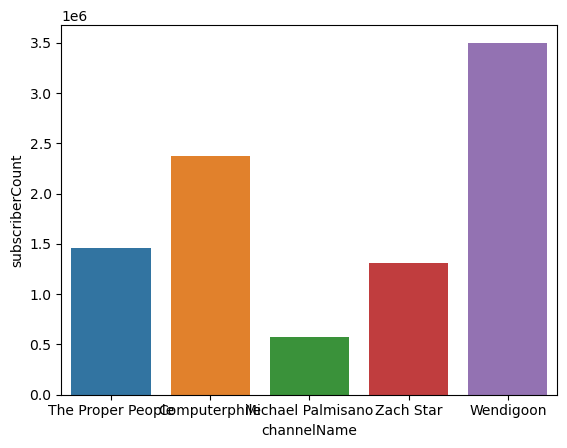

In [91]:
ax = sns.barplot(x = 'channelName', y = 'subscriberCount', data = channelData)